# Motivation
In today's world, where the population is growing at a tremendous pace, the challenges regarding food production are also increasing, with the primary objective of keeping the supply in line with the demand. In agriculture, crop diseases are common, and it becomes crucial to keep the crops away from these diseases. It becomes even more strenuous to keep every plant in check.

# Objective
The goal of this project is to create a CNN model that can accurately predict if a plant's leaf is healthy or infected, and if infected, then what disease is involved. Here I've used transfer learning and also used the VGG16 model as a base for prediction.

In [1]:
# Importing the required Libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import glob
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_path = "../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set"
valid_path = "../input/tomato-leaf-disease/Tomato Leaf Diseases/Validation Set"

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True, 
                                   vertical_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [4]:
# Augmenting training data for more training examples
training_set = train_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Training Set',
                                                 target_size = (224, 224),
                                                 batch_size = 200,
                                                 class_mode = 'categorical')

Found 10000 images belonging to 10 classes.


In [5]:
validation_set = valid_datagen.flow_from_directory('../input/tomato-leaf-disease/Tomato Leaf Diseases/Validation Set',
                                            target_size = (224, 224),
                                            batch_size = 70,
                                            class_mode = 'categorical')

Found 7000 images belonging to 10 classes.


# **Using Transfer Learning (VGG16)**

In [6]:
# Downloading the VGG16 model
vgg16_model =  tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 12s 0us/step


In [7]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [8]:
# Not training existing weights
for layer in model.layers:
    layer.trainable = False

In [9]:
model.add(Dense(units=10, activation= 'softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [11]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [12]:
mod = model.fit(x = training_set, validation_data=validation_set, epochs=50, verbose = 1)

Epoch 1/50
50/50 [==============================] - 268s 5s/step - loss: 2.0594 - accuracy: 0.3029 - val_loss: 1.7327 - val_accuracy: 0.4193
Epoch 2/50
50/50 [==============================] - 149s 3s/step - loss: 1.5347 - accuracy: 0.5249 - val_loss: 1.4431 - val_accuracy: 0.5571
Epoch 3/50
50/50 [==============================] - 151s 3s/step - loss: 1.3380 - accuracy: 0.5841 - val_loss: 1.3124 - val_accuracy: 0.5961
Epoch 4/50
50/50 [==============================] - 150s 3s/step - loss: 1.2201 - accuracy: 0.6175 - val_loss: 1.2538 - val_accuracy: 0.6019
Epoch 5/50
50/50 [==============================] - 150s 3s/step - loss: 1.1391 - accuracy: 0.6392 - val_loss: 1.1883 - val_accuracy: 0.6160
Epoch 6/50
50/50 [==============================] - 151s 3s/step - loss: 1.0757 - accuracy: 0.6575 - val_loss: 1.1349 - val_accuracy: 0.6253
Epoch 7/50
50/50 [==============================] - 149s 3s/step - loss: 1.0343 - accuracy: 0.6730 - val_loss: 1.0574 - val_accuracy: 0.6687
Epoch 8/50
50

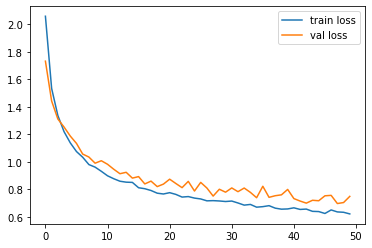

In [13]:
# Loss Plot
plt.plot(mod.history['loss'], label='train loss')
plt.plot(mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

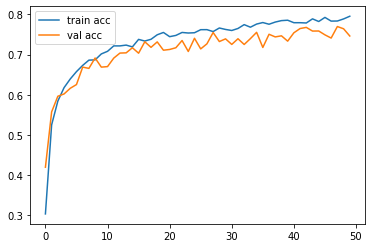

In [14]:
# accuracy plot
plt.plot(mod.history['accuracy'], label='train acc')
plt.plot(mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

**Note**
From the above Accuracy and Loss plots, it is evident that the model started to overfit a bit. That can be confirmed by looking at the diverging training and validation losses.

# Updating all the parameters of VGG16 model

In [6]:
vgg16 =  tf.keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 14s 0us/step


In [7]:
vggmodel = Sequential()
for layer in vgg16.layers[:-1]:
    vggmodel.add(layer)

In [8]:
vggmodel.add(Dense(units=10, activation= 'softmax'))
vggmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [9]:
vggmodel.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
vgg_mod = vggmodel.fit(x = training_set, validation_data=validation_set, epochs=100, verbose = 1)

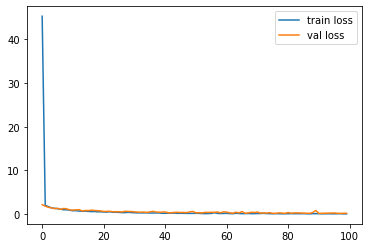

In [11]:
# Loss Plot
plt.plot(vgg_mod.history['loss'], label='train loss')
plt.plot(vgg_mod.history['val_loss'], label='val loss')
plt.legend()
plt.show()

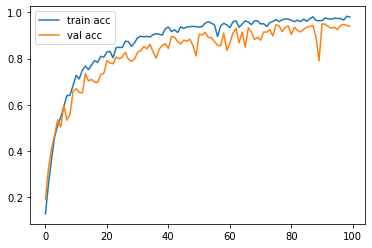

In [12]:
# accuracy plot
plt.plot(vgg_mod.history['accuracy'], label='train acc')
plt.plot(vgg_mod.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

Using the Vgg16 model as a base and updating all the parameters, we notice that it performs distinctly well as opposed to using Transfer Learning and can be confirmed by looking at the Loss curves where both overlap and do not diverge.

# Limitations
Here I could only use the VGG16 model because of the size of the data, and more importantly, because of hardware limitations.